<a href="https://colab.research.google.com/github/Varun7860dixit/Diabetes_Prediction_System_using_SupervisedMachineLearning/blob/main/Diabetes_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# ---- IMPORT LIBRARIES ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# ---- LOAD & CLEAN DATA ----
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [35]:
# Replace zeroes with NaN in specified columns
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
df[cols_to_fix] = df[cols_to_fix].fillna(df[cols_to_fix].median())
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.943000,72.385500,29.243500,140.48200,32.646600,0.470930,33.090500,0.342000
std,3.306063,30.535733,11.949824,9.124957,81.56284,7.190196,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.000000,14.00000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.00000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,126.00000,32.400000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.00000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.00000,80.600000,2.420000,81.000000,1.000000


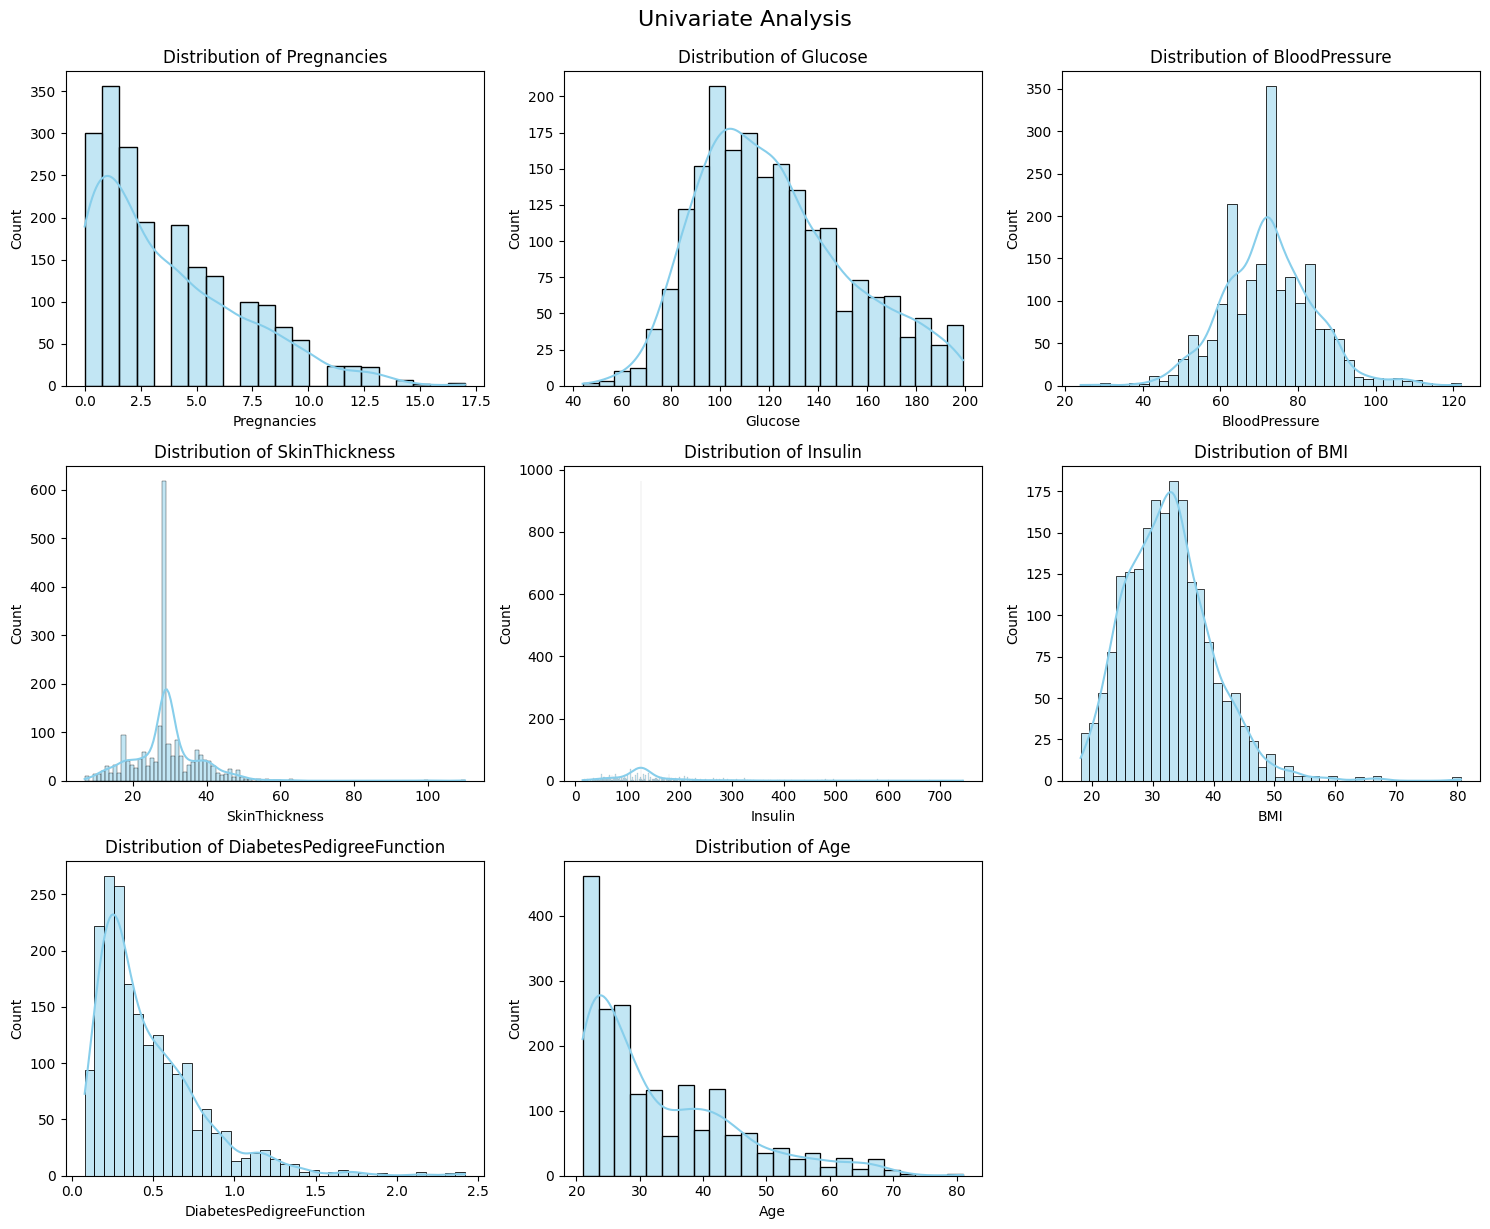

In [37]:
# ---- Univariate Analysis (Histplot) ----
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.suptitle("Univariate Analysis", fontsize=16, y=1.02)
plt.show()

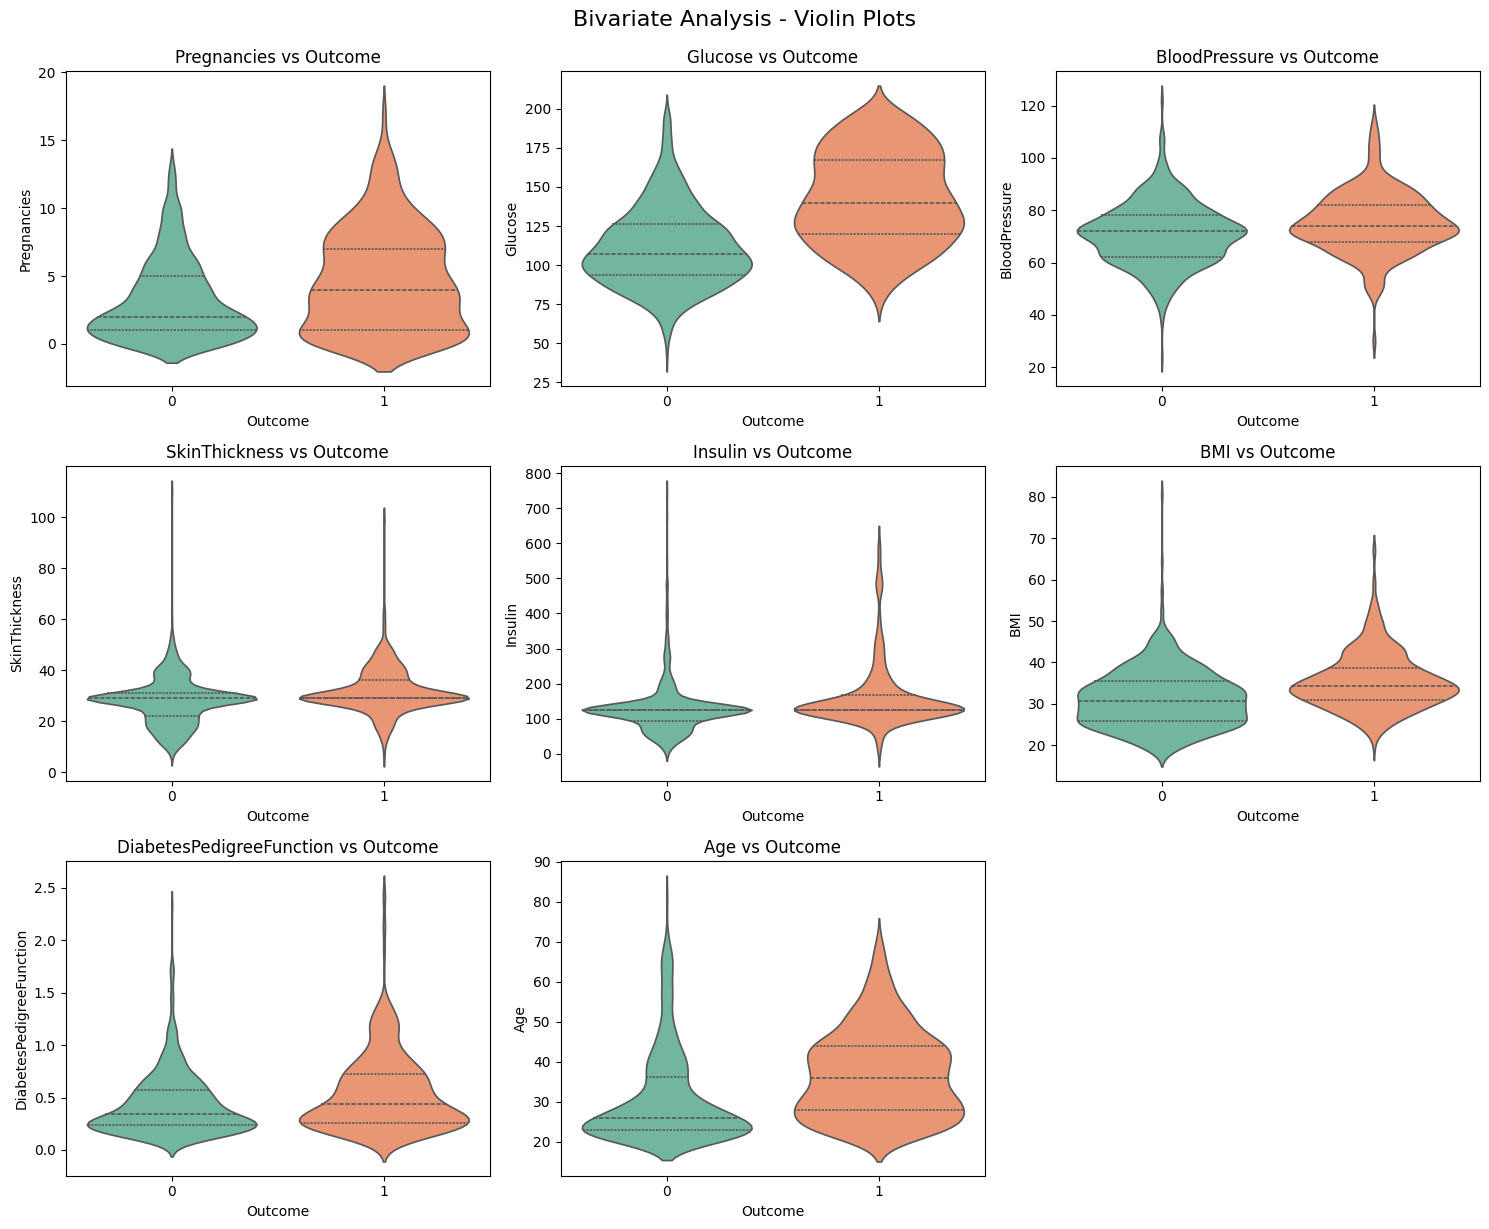

In [38]:
# ---- Bivariate Analysis (Violin Plot) ----
plt.figure(figsize=(15, 12))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x="Outcome", y=col, data=df, hue="Outcome", legend=False, inner="quartile", palette="Set2")
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.suptitle("Bivariate Analysis - Violin Plots", fontsize=16, y=1.02)
plt.show()


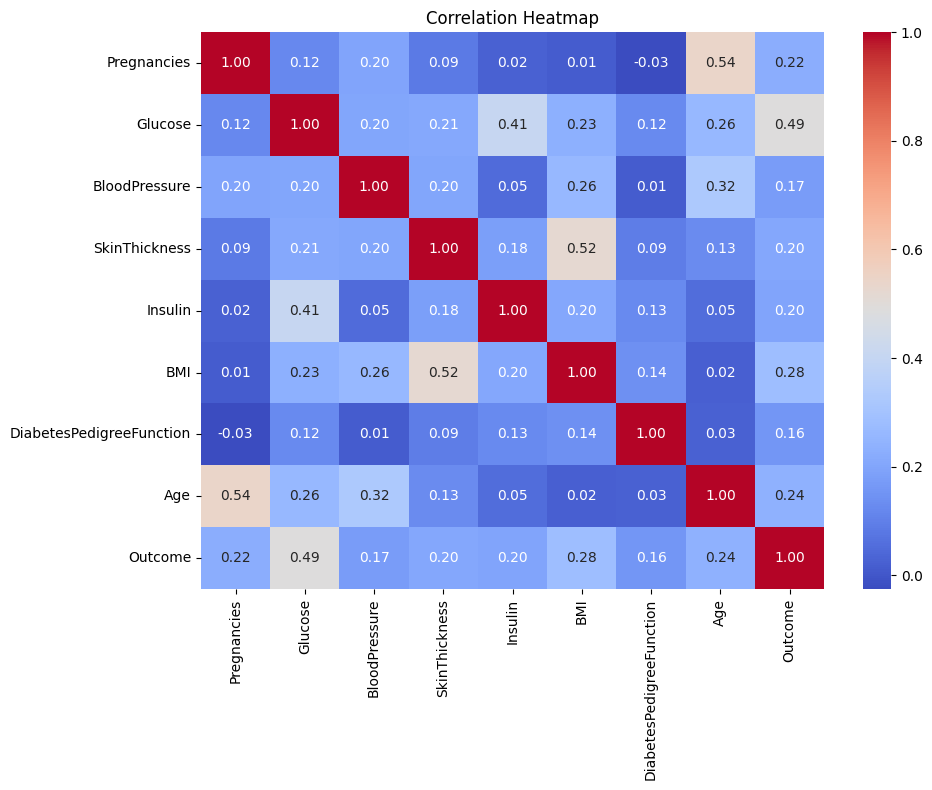

In [39]:
# ---- Multivariate Analysis (Correlation Heatmap) ----
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

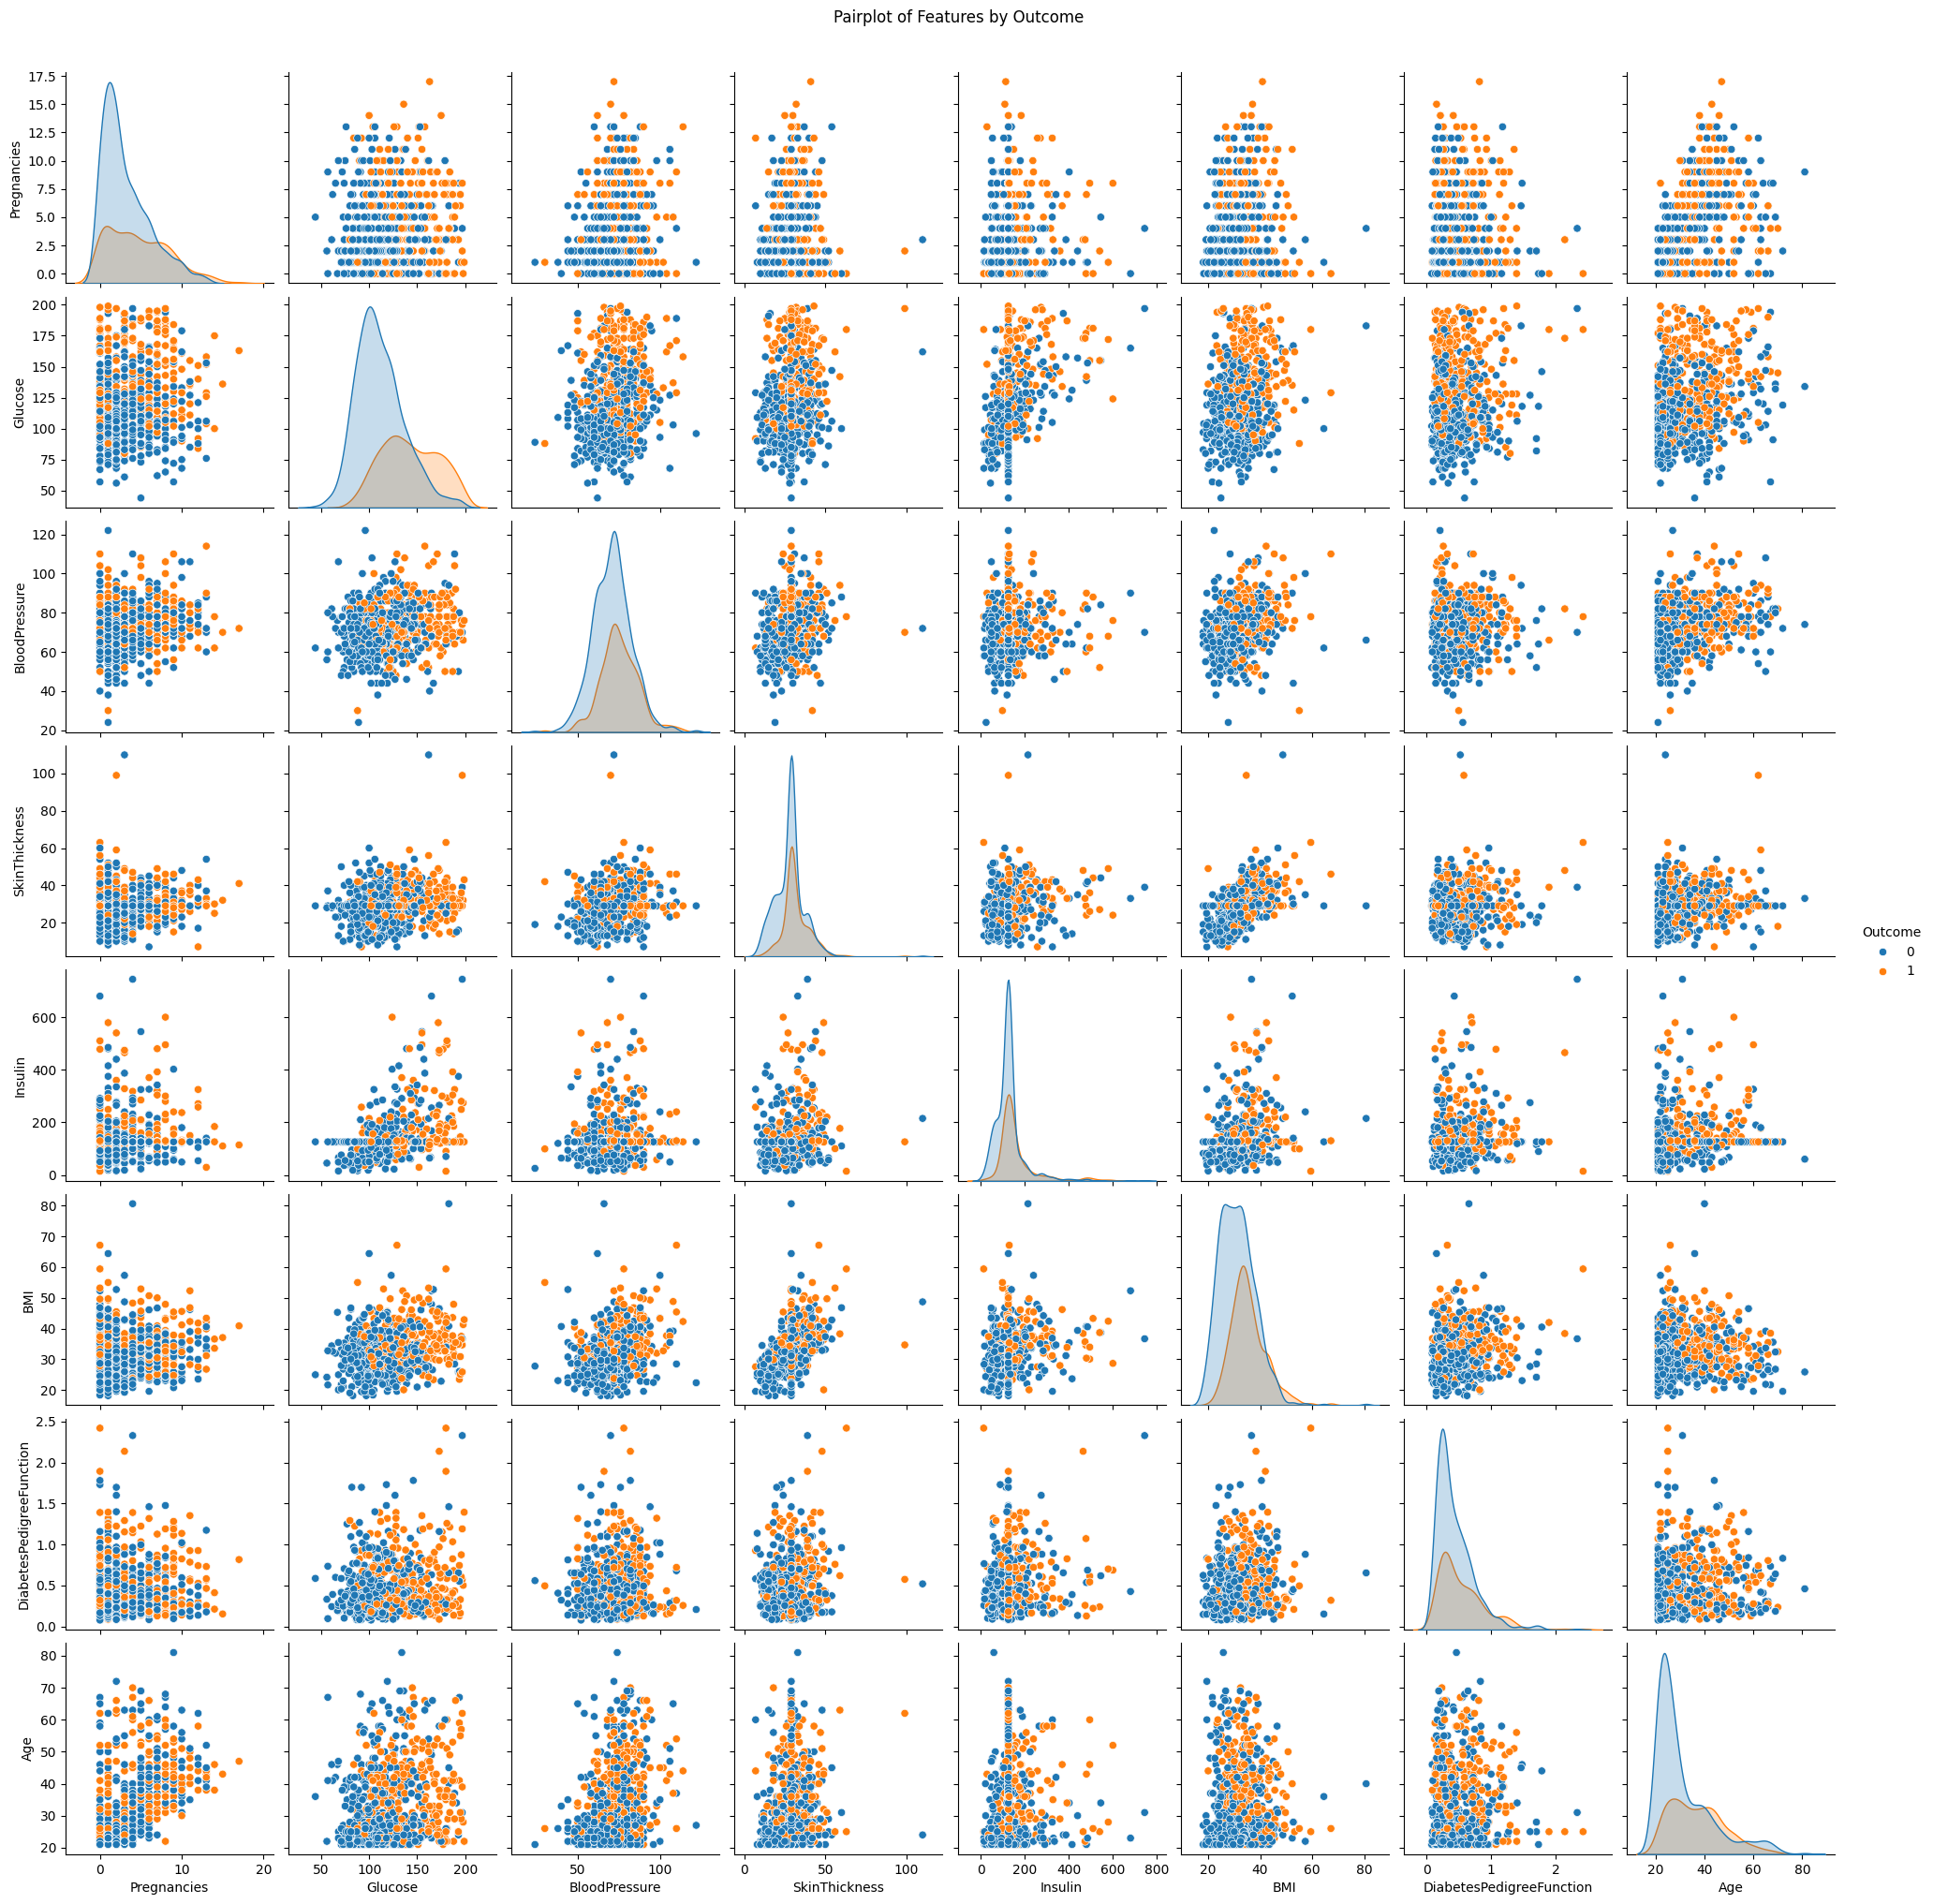

In [40]:
# Pairplot
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.suptitle("Pairplot of Features by Outcome", y=1.02)
plt.show()

In [41]:
# ---- SPLIT DATA ----
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# ---- MODEL TRAINING & EVALUATION ----
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True)
}

In [43]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    results[name] = {
        "model": model,
        "accuracy": accuracy,
        "y_pred": y_pred
    }

    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.9800
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       253
           1       0.99      0.96      0.97       147

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400


Logistic Regression Accuracy: 0.7725
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       253
           1       0.77      0.54      0.63       147

    accuracy                           0.77       400
   macro avg       0.77      0.72      0.73       400
weighted avg       0.77      0.77      0.76       400


SVM Accuracy: 0.7675
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       253
           1       0.79      0.50      0.61       147

    accuracy                           0.77       400
   macro avg       0.77      0.71   

<ipython-input-44-db6e01ab1962>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=[r["accuracy"] for r in results.values()], palette=colors)


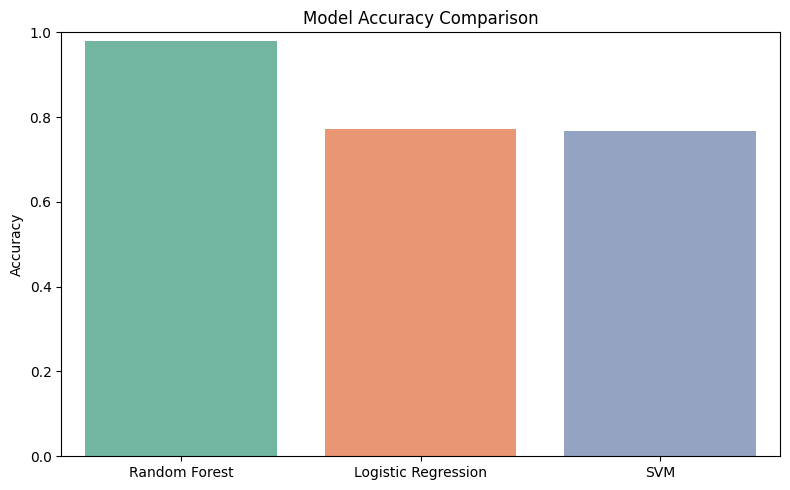

In [44]:
# ---- VISUALIZATION OF MODEL RESULTS ----

# Accuracy Comparison
plt.figure(figsize=(8, 5))
colors = sns.color_palette("Set2", len(results))
sns.barplot(x=list(results.keys()), y=[r["accuracy"] for r in results.values()], palette=colors)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

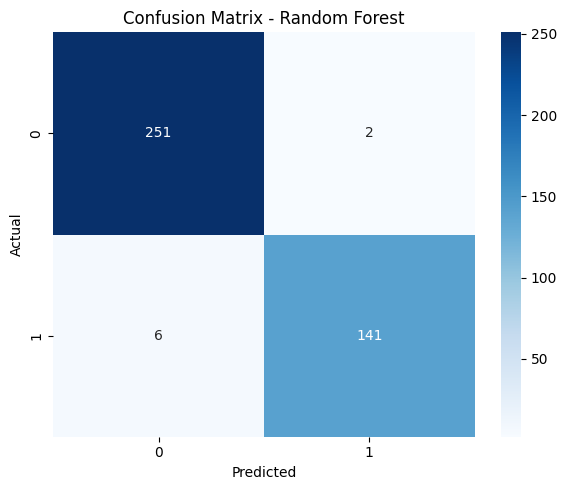

In [45]:
# Confusion Matrix - Random Forest
rf_cm = confusion_matrix(y_test, results["Random Forest"]["y_pred"])
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

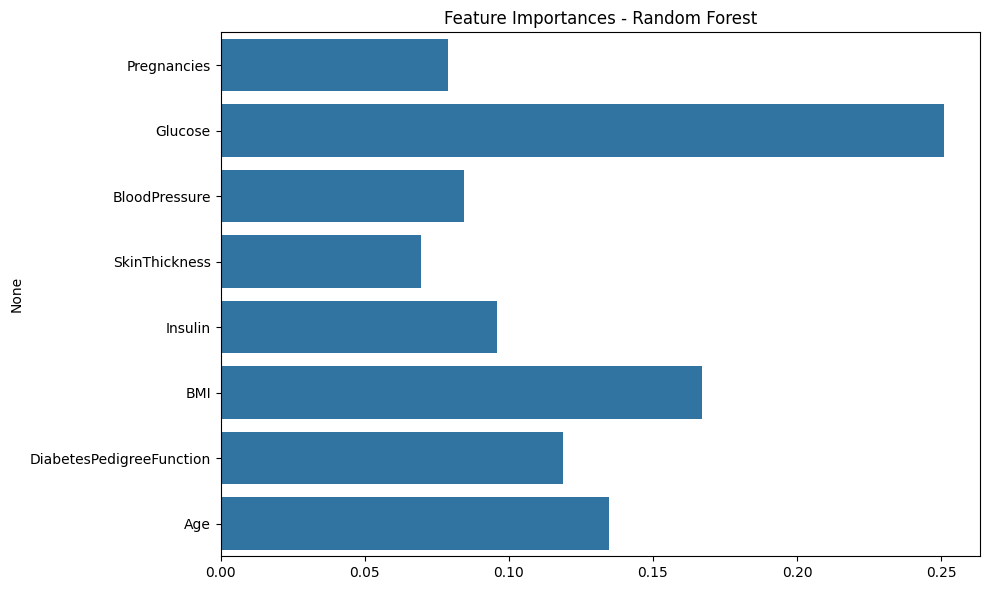

In [46]:
# Feature Importance - Random Forest
importances = results["Random Forest"]["model"].feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

In [47]:
# ---- SELECT BEST MODEL ----
best_model = results["Random Forest"]["model"]
print("\n✅ Random Forest model is selected as the best model.")

# ---- PREDICT WITH USER INPUT ----
print("\n🎯 Enter patient data to predict diabetes:")

try:
    pregnancies = int(input("Pregnancies: "))
    glucose = int(input("Glucose: "))
    bp = int(input("Blood Pressure: "))
    skin = int(input("Skin Thickness: "))
    insulin = int(input("Insulin: "))
    bmi = float(input("BMI: "))
    dpf = float(input("Diabetes Pedigree Function: "))
    age = int(input("Age: "))

    sample = pd.DataFrame([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]],
                          columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
                                   "DiabetesPedigreeFunction", "Age"])

    prediction = best_model.predict(sample)
    result = "🟥 Positive for Diabetes" if prediction[0] == 1 else "🟩 Negative for Diabetes"
    print(f"\nPrediction: {result}")

except Exception as e:
    print("⚠️ Invalid input. Please restart and enter valid values.")



✅ Random Forest model is selected as the best model.

🎯 Enter patient data to predict diabetes:
Pregnancies: 5
Glucose: 160
Blood Pressure: 110
Skin Thickness: 40
Insulin: 130
BMI: 35
Diabetes Pedigree Function: 0.45
Age: 39

Prediction: 🟥 Positive for Diabetes
